## Search for dividend growth companies

### Update Oct 2023

We will begin our search with in Netherlands, which currently seems to be a booming economy and has relatively low dividend tax 15% (https://taxsummaries.pwc.com/netherlands/corporate/withholding-taxes).

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
import datetime
import pytz


In [3]:
# dfs = pd.read_html("https://www.dividendmax.com/stock-exchange-listings/netherlands/euronext-amsterdam")
df = pd.read_csv("amsterdam_exch_2023-10-14.csv", sep=";")
def flatten(l):
    return [item for sublist in l for item in sublist]
pd.DataFrame(flatten(df["Market"].str.split(",").to_list()))[0].unique()

array(['Euronext Amsterdam', 'Euronext Paris', ' Amsterdam',
       'Euronext Brussels', ' Brussels', ' Paris'], dtype=object)

In [6]:
df.iloc[0]["Symbol"]

'AALB'

In [4]:
symbol = df.iloc[0]["Symbol"]
company = yf.Ticker(symbol + ".AS")
div_df = pd.DataFrame(company.dividends).reset_index()
if len(div_df):
    tz = pytz.timezone(str(div_df["Date"].iloc[0].tz))
    div_df_10yrs = div_df[div_df["Date"] >= datetime.datetime(2013, 1, 1, tzinfo=tz)]
    div_df_10yrs_grouped = div_df_10yrs.groupby(div_df_10yrs["Date"].dt.year).sum(numeric_only=True).reset_index()
    div_df_10yrs_grouped["pct_change"] = div_df_10yrs_grouped["Dividends"].pct_change(periods=1)
    div_df_10yrs_grouped["pct_change_10"] = div_df_10yrs_grouped["Dividends"].pct_change(periods=10)


In [118]:
div_df_10yrs_grouped

,Date,Dividends,pct_change,pct_change_10
0,2016,0.058349,NaN,NaN
1,2017,0.068074,0.166670,NaN
2,2018,0.077799,0.142859,NaN
3,2019,0.080000,0.028291,NaN
4,2020,0.080000,0.000000,NaN
5,2021,0.080000,0.000000,NaN
6,2022,0.110000,0.375000,NaN
7,2023,0.120000,0.090909,NaN


In [145]:
q_low = div_df_10yrs_grouped["pct_change"].abs().quantile(0.1)
q_high = div_df_10yrs_grouped["pct_change"].quantile(0.9)
div_df_10yrs_grouped[(div_df_10yrs_grouped["pct_change"].abs() > q_low) & (div_df_10yrs_grouped["pct_change"].abs() < q_high)]["pct_change"].mean()

0.36161003606346187

<Axes: xlabel='Date'>

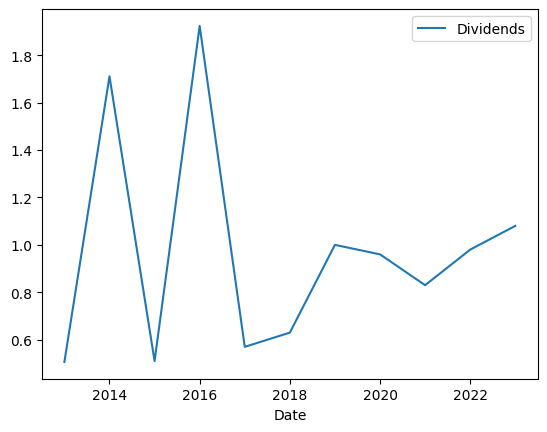

In [114]:
div_df_10yrs_grouped.plot(x="Date", y="Dividends")

In [141]:
div_df_10yrs_grouped["Dividends"].pct_change(periods=10)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10    2.171429
Name: Dividends, dtype: float64

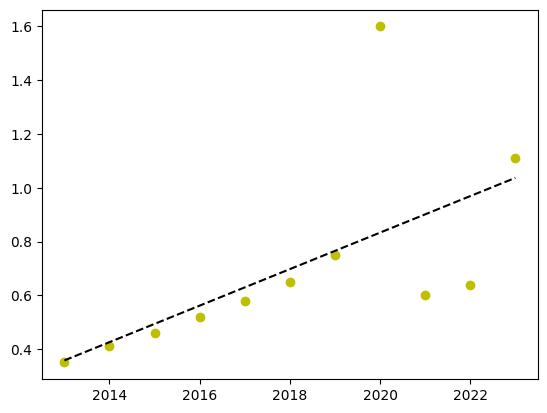

In [142]:
x = div_df_10yrs_grouped["Date"]
y = div_df_10yrs_grouped["Dividends"]

coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef) 
import matplotlib.pyplot as plt

plt.plot(x, y, 'yo', x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker


In [144]:
coef

array([ 6.79090909e-02, -1.36343273e+02])

In [25]:
pd.concat([div_df_10yrs_grouped, div_df_10yrs_grouped.shift(-10)], axis=1)

,Date,Dividends,pct_change,pct_change_10,Date,Dividends,pct_change,pct_change_10
0,2013,0.35,NaN,NaN,2023.0,1.11,0.734375,2.171429
1,2014,0.41,0.171429,NaN,NaN,NaN,NaN,NaN
2,2015,0.46,0.121951,NaN,NaN,NaN,NaN,NaN
3,2016,0.52,0.130435,NaN,NaN,NaN,NaN,NaN
4,2017,0.58,0.115385,NaN,NaN,NaN,NaN,NaN
5,2018,0.65,0.120690,NaN,NaN,NaN,NaN,NaN
6,2019,0.75,0.153846,NaN,NaN,NaN,NaN,NaN
7,2020,1.60,1.133333,NaN,NaN,NaN,NaN,NaN
8,2021,0.60,-0.625000,NaN,NaN,NaN,NaN,NaN
9,2022,0.64,0.066667,NaN,NaN,NaN,NaN,NaN


In [26]:
((div_df_10yrs_grouped["Dividends"].shift(-10) / div_df_10yrs_grouped["Dividends"]) ** (1 / 10) - 1)

0     0.122343
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
Name: Dividends, dtype: float64

In [38]:
div_df_10yrs_grouped[(np.abs(stats.zscore(div_df_10yrs_grouped["Dividends"])) > 2)].to_dict(orient="records")


[{'Date': 2020,
  'Dividends': 1.6,
  'pct_change': 1.1333333333333333,
  'pct_change_10': nan}]

### Search for low debt companies

In [22]:
balance = company.balance_sheet
income = company.income_stmt
latest = balance.columns.sort_values()[-1]
latest

Timestamp('2022-12-31 00:00:00')

In [30]:
balance[latest]["Net Debt"] / income[latest]["Net Income"]

1.9520958083832336

In [31]:
company.ticker

'AALB.AS'